<a href="https://colab.research.google.com/github/Gyuhyeon-Eom/Marine-Data-Analysis-by-Python/blob/main/newton_fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

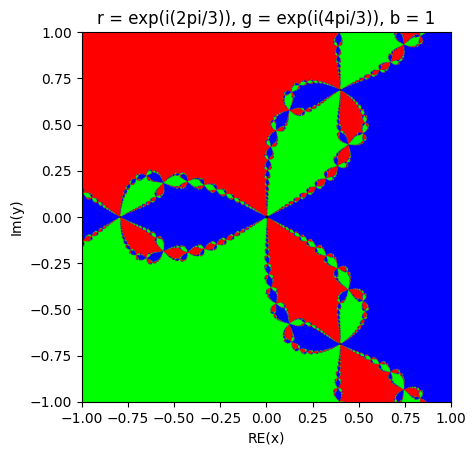

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_min = -1.0
x_max = 1.0
y_min = -1.0
y_max = 1.0

def newton(z):
    return z * z * z - 1.0

def dnewton(z):
    return 3.0 * (z * z)

def newtons_method(f, f_prime, z):
    for i in range(40):
        zplus = z - f(z) / f_prime(z)

        if abs(f(z)) > 10e10:
            return None

        if abs(f(z)) < 10e-14:
            return None

        if abs(zplus - z) < 10e-4:
            return z
        z = zplus

    return None

def draw(f, f_prime, size):
    colors = [
        (255, 0, 0),
        (0, 255, 0),
        (0, 0, 255)
    ]

    roots = []
    img = np.zeros((size, size, 3), dtype=np.uint8)
    for y in range(size):
        z_y = y * (y_max - y_min) / (size - 1) + y_min
        for x in range(size):
            z_x = x * (x_max - x_min) / (size - 1) + x_min
            root = newtons_method(f, f_prime, complex(z_x, z_y))
            if root:
                flag = False
                for test_root in roots:
                    if abs(test_root - root) < 10e-3:
                        root = test_root
                        flag = True
                        break
                if not flag:
                    roots.append(root)
            if root:

                if abs(root - np.exp(2j * np.pi / 3)) < 1e-3:
                    img[y, x, :] = colors[1]
                elif abs(root - np.exp(4j * np.pi / 3)) < 1e-3:
                    img[y, x, :] = colors[0]
                elif abs(root - 1) < 1e-3:
                    img[y, x, :] = colors[2]

    return img

size = 1024
result_img = draw(newton, dnewton, size)
plt.imshow(result_img, extent=[x_min, x_max, y_min, y_max])
plt.title("r = exp(i(2pi/3)), g = exp(i(4pi/3)), b = 1")
plt.xlabel("Re(x)")
plt.ylabel("Im(y)")
plt.show()